# Logistic Regression 
## Adjuvent Chemotherapy for Stage B/C colon cancer

Description

Stage B/C colon cancer is the stage where the cancer has spread to through the muscle layer of the colon and/or rectum wall to the serosa (outermost layer) of the colon and/or rectum wall or has spread through the serosa to the tissue that lines the organs in the abdomen. Usually surgery is done to remove the cancer. After surgery, the patient may be given addtional treatment to reduce the chances of reoccurance of cancer, also known as adjuvent cancer therapy. It's success depends on the patient and the combination of drug used. 

In the case here, we have access to data from one of the first successful trials of adjuvant chemotherapy for colon cancer where combination of Levamisole (a low-toxicity compound previously used to treat worm infestations in animals) and 5-FU (a moderately toxic (as these things go) chemotherapy agent) is used as a surgical adjuvant therapy. There are two records per person, one for recurrence and one for death. The souce and context of this data is taken from the the research paper of Laurie JA, Moertel CG, Fleming TR, et al. *Surgical adjuvant therapy of large-bowel carcinoma: an evaluation of levamisole and the combination of levamisole and fluorouracil. The North Central Cancer Treatment Group and the Mayo Clinic. J Clinic

**Attribute Information**
- id:	id
- study:	1 for all patients
- sex:	1=male
- age:	in years
- obstruct:	obstruction of colon by tumour
- perfor:	perforation of colon
- adhere:	adherence to nearby organs
- nodes:	number of lymph nodes with detectable cancer
- time:	days until event or censoring
- status:	censoring status
- differ:	differentiation of tumour (1=well, 2=moderate, 3=poor)
- extent:	Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures)
- surg:	time from surgery to registration (0=short, 1=long)
- node4:	more than 4 positive lymph nodes
- etype:	event type: 1=recurrence,2=death

**Loading Libraries**

In [42]:
# Standard Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing Sklearn package's data splitting function to split the data for training and testing purpose

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing libraries for modelling
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error


**Importing the Dataset**

In [3]:
df=pd.read_csv('colon.csv').drop('Unnamed: 0', axis=1)

## Exploratory Data Analysis

In [4]:
df.shape

(1858, 15)

In [5]:
df.head()

,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
0,1,1,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2
1,1,1,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1
2,2,1,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,2
3,2,1,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,1
4,3,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1857
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1776 non-null   int64  
 1   study     1776 non-null   int64  
 2   sex       1776 non-null   int64  
 3   age       1776 non-null   int64  
 4   obstruct  1776 non-null   int64  
 5   perfor    1776 non-null   int64  
 6   adhere    1776 non-null   int64  
 7   nodes     1776 non-null   float64
 8   status    1776 non-null   int64  
 9   differ    1776 non-null   float64
 10  extent    1776 non-null   int64  
 11  surg      1776 non-null   int64  
 12  node4     1776 non-null   int64  
 13  time      1776 non-null   int64  
 14  etype     1776 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 222.0 KB


In [6]:
df.isnull().sum()

id           0
study        0
sex          0
age          0
obstruct     0
perfor       0
adhere       0
nodes       36
status       0
differ      46
extent       0
surg         0
node4        0
time         0
etype        0
dtype: int64

In [8]:
#since we have null values for nodes and differ, we would be dropping those data points 
#as it is not good idea to impute values when working with a medical trial dataset
df=df.dropna()

In [9]:
df.describe()

,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
count,1776.000000,1776.0,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000
mean,466.506757,1.0,0.518018,59.810811,0.192568,0.030405,0.144144,3.663288,0.493243,2.061937,2.884009,0.268018,0.264640,1542.555180,1.500000
std,269.321338,0.0,0.499816,11.911137,0.394427,0.171748,0.351335,3.539129,0.500095,0.510833,0.478322,0.443052,0.441265,946.741234,0.500141
min,1.000000,1.0,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,8.000000,1.000000
25%,234.750000,1.0,0.000000,53.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,573.000000,1.000000
50%,466.500000,1.0,1.000000,61.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1856.000000,1.500000
75%,700.250000,1.0,1.000000,69.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2331.000000,2.000000
max,929.000000,1.0,1.000000,85.000000,1.000000,1.000000,1.000000,33.000000,1.000000,3.000000,4.000000,1.000000,1.000000,3329.000000,2.000000


In [20]:
dfnumeric=df[['age','time']]
numeric_columns=list(dfnumeric.columns.values)
numeric_columns

['age', 'time']

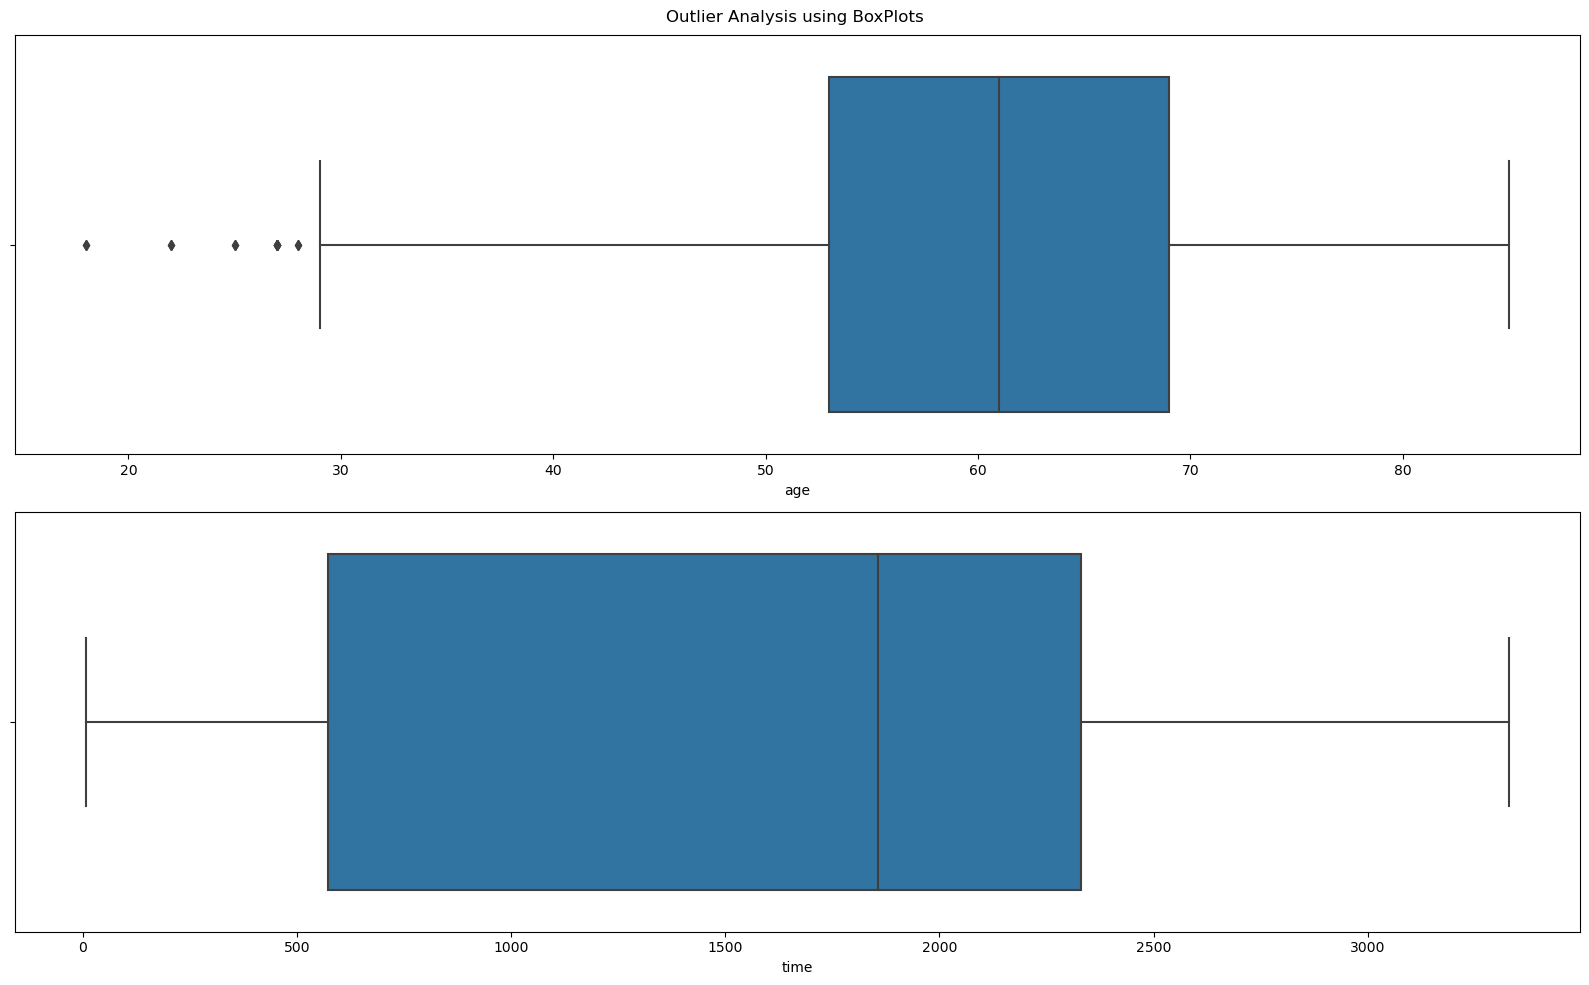

In [22]:
fig,ax=plt.subplots(2, figsize=(16,10))
ax=ax.flatten()

for i,c in enumerate(numeric_columns):
    sns.boxplot(x=dfnumeric[c], ax=ax[i])
    plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 12)
fig.tight_layout()

In [11]:
#checking the level of dependent variable - etype
df.groupby(['etype']).count()

,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time
etype,,,,,,,,,,,,,,
1,888,888,888,888,888,888,888,888,888,888,888,888,888,888
2,888,888,888,888,888,888,888,888,888,888,888,888,888,888


<AxesSubplot:xlabel='nodes', ylabel='age'>

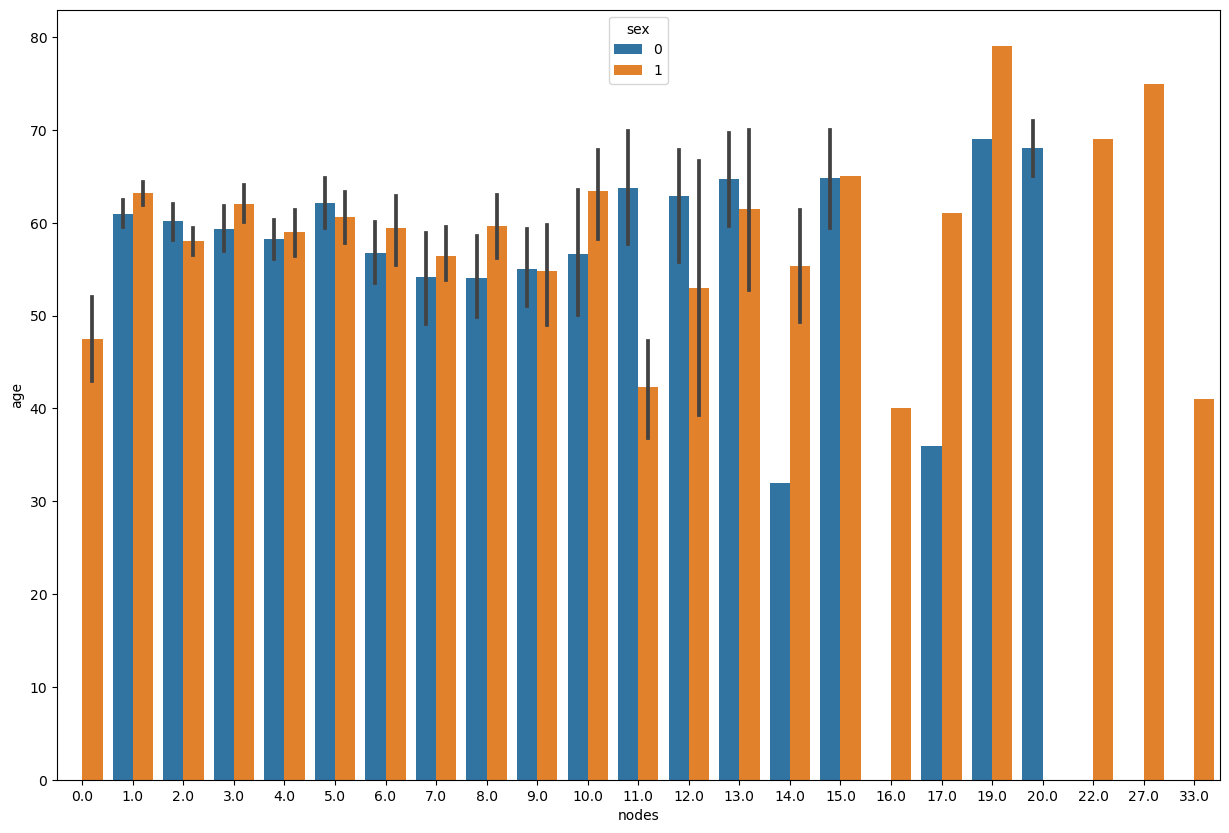

In [31]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='nodes', y='age', hue='sex')

<AxesSubplot:xlabel='extent', ylabel='age'>

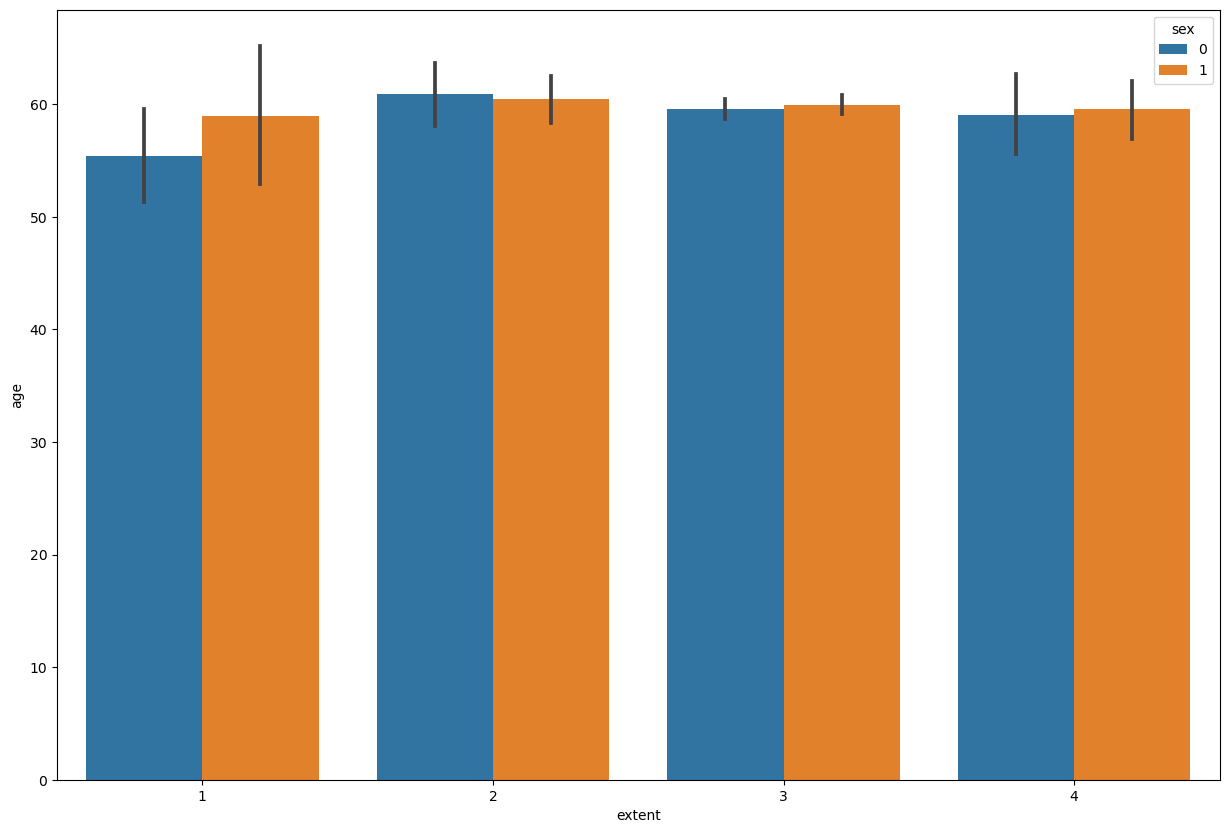

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='extent', y='age', hue='sex')

**Inferences**

1. Most of our dataset are in integer or float form
2. There were some missing values that were dropped
3. The sample data has 60 as the mean age of patient with min age being 18 and maximum 85
4. The mean number of nodes with detectable cancer is 4with minmum nuber of nodes being 0 and maximum being 33 (only found in males)
5. The mean time until censoring is 1542 days, with min days being 8 and max being 3329 days
6. There are few outliers present in age (young people with exception)
7. The extent of spread is found to be mostly in muscle, serosa and contiguous structures. The extent of spread is found to be of equal extent in both male and female

### Bivariate analysis

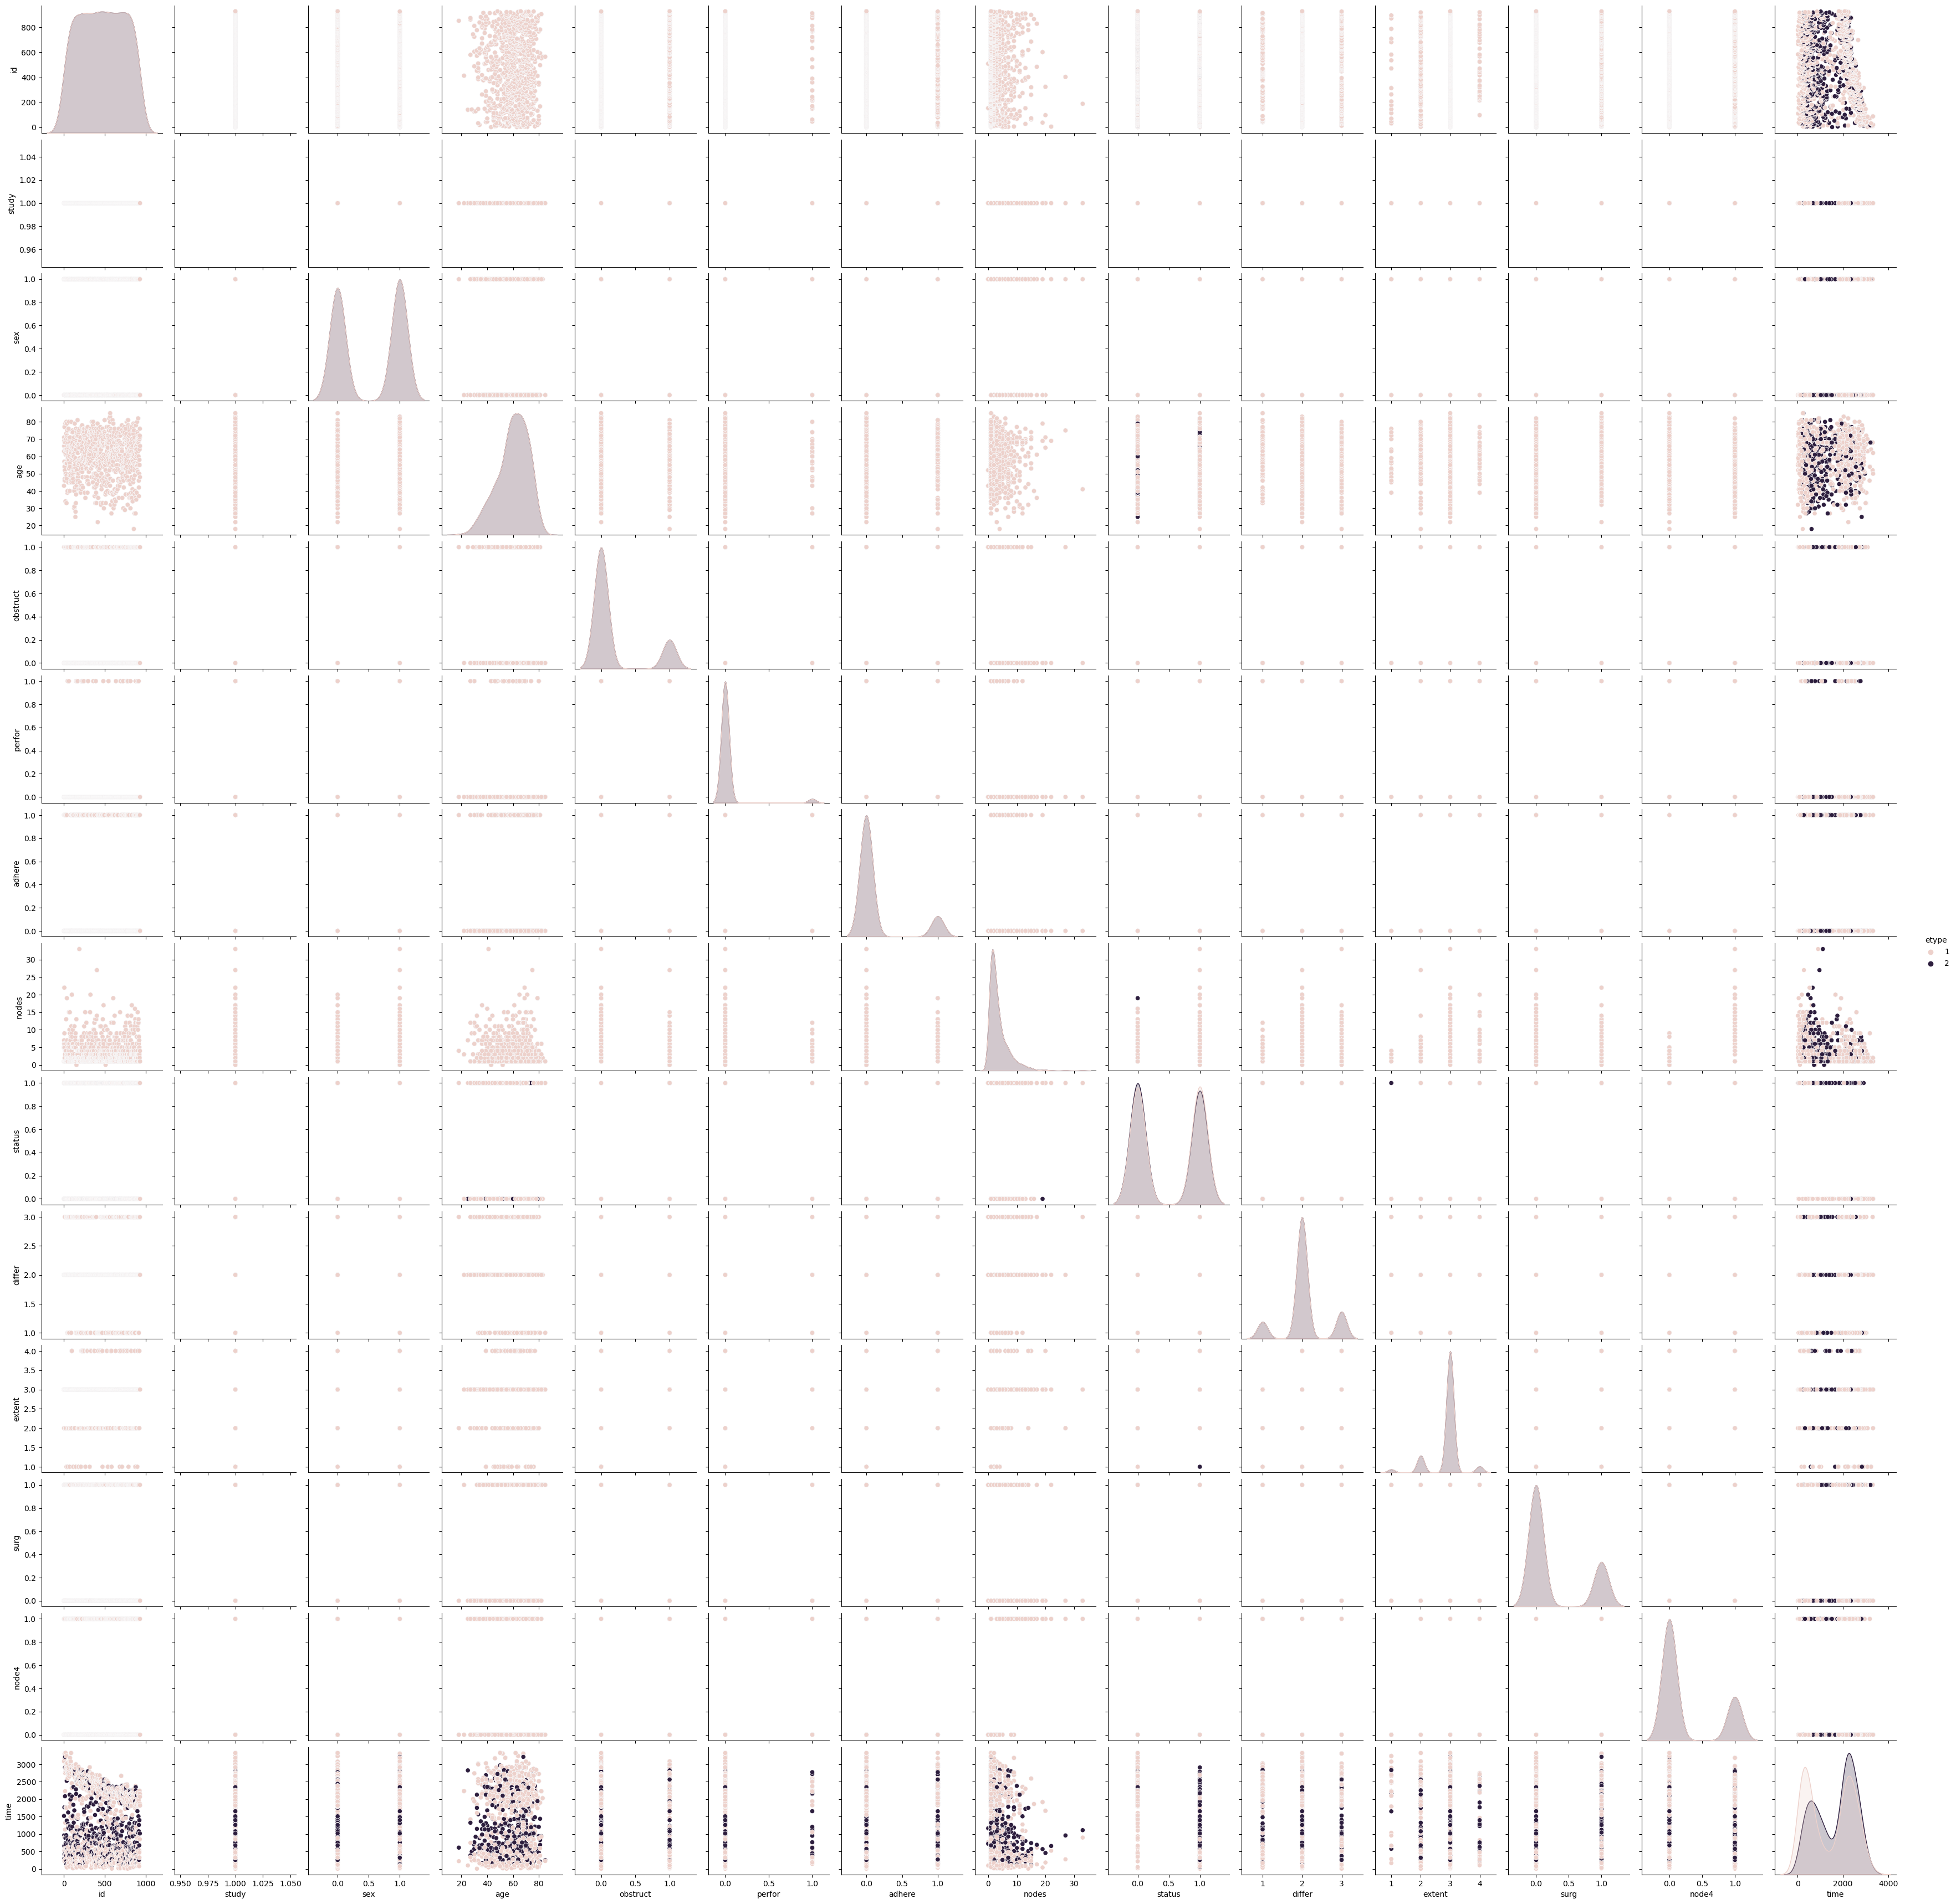

In [12]:
sns.pairplot(df, hue='etype', diag_kind = 'kde')

**Inferences**

From the pairplot it can be seen that there is no clear correlation between any of the variables, except with themselves. Bimodal plots are seen for correlation of variables with themselves, indicating that there are two kinds of patients for each variable, for example, male and female, yes or no for obstruct, yes and no for adhereance and so on.

### Logistic modelling

In [36]:
#dropping the dependent variable
X=df.drop('etype', axis=1)
y=df[['etype']]

In [37]:
#splitting the data in 30:70 ratio (30% for test and 70% for train data)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=7)

### Grid Search

Grid search is used to find what combination of hyperparameters should be used to get a better logisitic regression result

In [39]:
log_grid={'penalty':[['l1','l2'],'none'],
      'solver':['sag','lbfgs', 'liblinear', 'saga', 'newton-cg'],
      'tol':[0.0001,0.00001]}

In [40]:
log_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [55]:
#in grid search, cross validation is taken to be 2, with emphasis on recall as evalution metrics 
#because its more important to find if the model is predicting less flase negative cases (overlooked cases)
grid_search = GridSearchCV(estimator = log_model, param_grid = log_grid, cv = 3,n_jobs=-1,scoring='recall')

In [56]:
grid_search.fit(X_train, y_train)

C:\Users\ARU PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ARU PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ARU PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ARU PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise ValueError(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': [['l1', 'l2'], 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'saga',
                                    'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='recall')

In [57]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


The model is best predicted with penalty being none, newton-cg as the solver and tolerance as 0.0001

In [58]:
log_best_model = grid_search.best_estimator_

In [59]:
# Prediction on the training set
y_test_predict = log_best_model.predict(X_test)

In [60]:
log_best_model.score(X_train, y_train)

0.5969428801287209

Our r-squared value is 59%, i.e. our model can predict the etype 59% of the time. This is bit low, maybe if use more variables like patient lifestyle and other co-morbities issue, then the prediction capacity of the model can be improved

              precision    recall  f1-score   support

           1       0.56      0.59      0.57       258
           2       0.59      0.57      0.58       275

    accuracy                           0.58       533
   macro avg       0.58      0.58      0.58       533
weighted avg       0.58      0.58      0.58       533
 



C:\Users\ARU PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


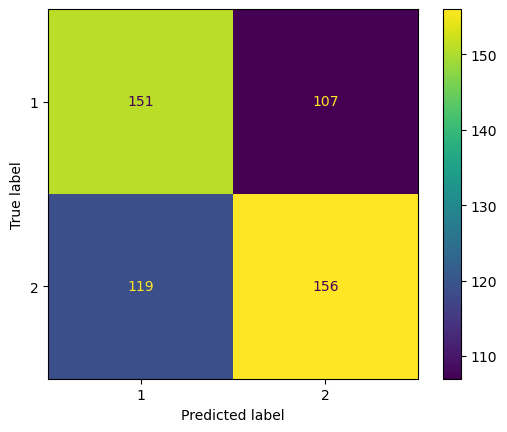

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

plot_confusion_matrix(log_best_model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

The accuracy of the model is 58% with avg recall and precision of 58%

### Feature importance

Feature: 0, Score: 0.00040
Feature: 1, Score: -0.53247
Feature: 2, Score: 0.00831
Feature: 3, Score: -0.00169
Feature: 4, Score: 0.16717
Feature: 5, Score: -0.15209
Feature: 6, Score: -0.03936
Feature: 7, Score: 0.00428
Feature: 8, Score: 1.30437
Feature: 9, Score: -0.07365
Feature: 10, Score: -0.32170
Feature: 11, Score: 0.02081
Feature: 12, Score: 0.12581
Feature: 13, Score: 0.00086


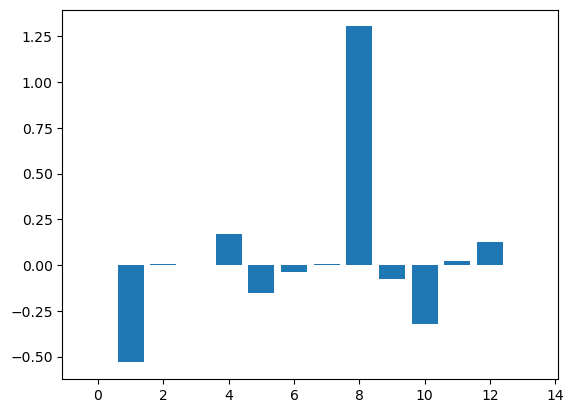

In [54]:
importance = log_best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



The most important feature for prediction is status followed by obstruct. The least important feature is id, study and extent 